# CE 93: Engineering Data Analysis 
# Fertility Rate and Life Expectancy Among Countries

##### By: *Seobin Yun* and *Connor Clark*

## Libraries Required for Exploratory Data Analysis (EDA)

The code that follows loads in the necessary libraries for analysis

In [1]:
# import python library / packages 
import numpy as np                                 # ndarrays for gridded data
import pandas as pd                                # DataFrames for tabular data
import matplotlib.pyplot as plt                    # plotting
import random                                      # random sampling
from scipy.stats import *                          # common distributions, t-test
import statistics as stats                         # statistics like mode
from sklearn.linear_model import LinearRegression  # linear regression
import statsmodels.api as sm                       # linear regression
from statsmodels.stats.weightstats import ztest    # ztest

## **1. Introduction**

In recent years, earth can expect to introduce an astonishing 140 million
newborns to the new world! Without proper context, one might assume this
number to be extremely large or extremely small, depending on who you ask.
Nonetheless, certain variables should be considered when discussing the topic of
newborns each year, which we will refer to as **fertility rate**. The variable we will
focus on in relation to the fertility rate will be **life expectancy**. In this report, we
will analyze the potential relationship between life expectancy and fertility rate
within the United States for given years.
Firstly, let's define our variables to better understand the quantity assigned to
each variable. **Fertility rate** is define as the number of births per woman, while
the **life expectancy** is defined as the expected amount of years for that newborn
to live. 

To set up such a relationship, we have selected two data sets, both from
the CE93 Data Summaries spreadsheet: (1) Fertility Rate (births) and (2) Average
Life Expectancy (yr). The data can be observed or downloaded into a CSV file by
visiting the gapminder website (https://www.gapminder.org/data/), where both
datasets have the year, as columns, along the x-axis, and the country, as rows, In [3]:
along the y-axis, with corresponding values in each cell. Along with the data
itself, the site provides sources from which data was collected to compile the
data set itself. However, we will instead be utilizing the provided data frame,
which merges the two data sets into a single data frame, rather than working
with two separate tables.
We have shown an idea of what you can expect from the datasets below. As one
can observe, the common variable between both data sets is the country along
with the corresponding year, which is where we will perform our analysis.

|Feature|Units|Description|Data type|
|:-|:-|:-|:-|
|country|N/A|country name|object|
|Fertility_rate|births|Average annual birth rate per country|float64|
|Life_expectancy|year|Average lifespan of individuals |float64|



---

### Raw Data
Here, we have shown the table that will allow us to make calculations in order to show the relationship, if any, between a country's fertility rate and life
expectancy.

##### Country
The country name is simply just the country. Thus, the data type of country is **object** type.

##### Fertility Rate
Here we have shown the first 5 entries of the data for fertility rate. Note that the ordering for this array goes by alphabetical order in accordance with the country. At a glance, we see that the fertility rate data is of type **float64**. 

##### Life Expectancy
Similarily, we have shown the actual data for the life expectancy csv file below, and we see that the life expectancy data is of type **float64**, too.
Again, the number of entries for life expectancy will be equal to the number of entries of countries and fertility rate. We have outputted the first 5 entries of the data set, where the ordering again is alphabetical by country.


In [2]:
# read a .csv file in as a DataFrame
data = pd.read_csv('CE93_08_Fertility_Expectancy.csv')

# returns the first 5 rows of the data set for fertility rate
data.head()


,country,Fertility_rate(births),Life_expectancy(yr)
0,Afghanistan,4.04,63.4
1,Angola,5.41,65.2
2,Albania,1.70,77.9
3,United Arab Emirates,1.69,74.0
4,Argentina,2.23,74.6


In order to make coding and analysis easier, we create different variables for each column in the DataFrame. 
* a variable `country` for `country` column
* a variable `fr` for `Fertility_Rate(births)` column
* a varialle `le` for  `Life_expectancy(yr)` column


In [3]:
country = data['country']
fr = data['Fertility_rate(births)']
le = data['Life_expectancy(yr)']

Now, we check the shape of data file.

In [4]:
# get the shape (rows, columns)
rows, columns = data.shape
# Print the number of rows and columns
print(f'The Data Frame has {rows} rows, each representing a country, and {columns} columns, where these are the labels for country, Fertility rate, and Life Expectancy.')

The Data Frame has 185 rows, each representing a country, and 3 columns, where these are the labels for country, Fertility rate, and Life Expectancy.


## **2. Summary Statistics**

Now, we calculate summary statistics including **measures of central tendency** and **measure of variability** for each column. (fertility rate and life expectancy)

##### *Measures of central tendency*
1. Mean
2. Median

##### *Measures of variability*
1. Variance
2. Standard deviation
3. Coefficient of variation

### <span style="color:blue">Fertility Rate</span>


First of all, we're going to calculate the worldwide mean of fertility rate. To calculate the mean of fertility rate as a whole, we'll simply take our data for fertility rate, add each value in the array together, and divided by the length, or number of entries, of the array. Another simple way to do this is by simply using **data.mean**, which is what we have down below.

In [5]:
fertility_mean = fr.mean()
print(f'Mean of Fertility rate is {fertility_mean.round(2)} births.')

Mean of Fertility rate is 2.66 births.


Next, we'll take the worldwide median of fertility rate, which is the exact middle
value of all entries when the array in ordered from smallest to largest value.
Again, for simplicity, we have utilitized the function data.median, to do the
work for us.

In [6]:

fertility_median = fr.median()
print(f'Median of Fertility rate is {fertility_median.round(2)} births.')

Median of Fertility rate is 2.2 births.


We can analyze that mean of fertility rate (2.66) births is higher than median of fertility rate (2.2 births). Being that the mean of the fertility rate is higher than the median, this indicates that there are outliers within the data. Whenever the mean is greater than the median, the outlier will be of larger value, as larger values increase the average of a data set, while barely affecting the median, if at all. Therefore, we can conclude that this fertility rate data is **right skewed (positively skewed)** and **median** is the best measure of central tendency.

---

Next, we calculate Variance for the fertility rate. Variance is the measure of dispersion of a specific value from the data set's average.

In [7]:

fertility_var = fr.var()
print(f'Variance of Fertility rate is {fertility_var.round(2)} square births.')

Variance of Fertility rate is 1.52 square births.


Calculate standard deviation by each country and each year.

In [8]:

fertility_stdev = fr.std()
print(f'Standard deviation of Fertility rate is {fertility_stdev.round(2)} births.')

Standard deviation of Fertility rate is 1.23 births.


Calculate the coefficient of variation of fertility rate.

In [9]:
fertility_cv = fertility_stdev / fertility_mean

print(f'Coefficient of variation of Fertility rate is {fertility_cv.round(2)}')

Coefficient of variation of Fertility rate is 0.46


A standard deviation of 1.23 births suggests that fertility rates deviate from the mean by approximately 1.23 births on average. This means that the majority of fertility rate data points are distributed between 1.43 and 3.89 births.

The coefficient of variation means ratio of standard deviation to mean. Thus, a coefficient of variation of 0.46 means that the variability in fertility rates is 46% of the mean fertility rate.

We believe that **the standard deviation** is the best measure of variability for the fertility rate dataset. This is because it represents the average size of the distances between data points and the mean, and its units match those of the dataset, making interpretation easier.


### <span style="color:blue">Life_expectancy</span>


First, we will make use of our separated data set for life expectancy and use it to
calculate the worldwide average for life expectancy.


In [10]:

life_mean = le.mean()
print(f'Mean of life expectancy is {life_mean.round(2)} years')

Mean of life expectancy is 72.39 years


Now, we'll use the **.median()** function to calculate the median life expectancy in
the world. From these calculations, we will be able to make some early
conclusions about the data just from these two calculations alone.


In [11]:

life_median = le.median()
print(f'Median of life expectancy is {life_median.round(2)} years')

Median of life expectancy is 73.2 years


We can analyze that median of life expectancy (73.2 years) is higher than mean
of life expectancy (72.39 years). This shows that outliers are on the lower end of
the the range, below the median. This will bring the average life expectancy
down in return. Thus, we can conlcude that this life expectancy data is **slightly left-skewed(negatively skewed)** and **median** is the best measure of central tendency.

Now, we'll make our calculation for the variance of life expectancy.


In [12]:

life_var = le.var()
print(f'Variance of life expectancy is {life_var.round(2)} years**2')

Variance of life expectancy is 45.35 years**2


Being that the variance of life expectancy is in year squared, we can not make
relevant conclusions, as the units are do not hold any value. Thus, we'll take the
standard deviation of the data to get a better understanding of the variability in
our life expectancy data set.

In [13]:

life_stdev = le.std()
print(f'Standard deviation of life expectancy is {life_stdev.round(2)} years')

Standard deviation of life expectancy is 6.73 years


In [14]:
life_cv = life_stdev / life_mean

print(f'Coefficient of variation of life expectancy is {life_cv.round(2)}.')

Coefficient of variation of life expectancy is 0.09.


A standard deviation of 6.73 years suggests that life expectancy deviate from the mean by approximately 6.73 years on average. This means that the majority of fertility rate data points are distributed between 65.66(72.39-6.73) and 79.12(72.39+6.73) years.

As mentioned earlier for the fertility rate, the coefficient of variation represents the ratio of standard deviation to the mean. Therefore, a coefficient of variation of 0.09 means that the variability in life expectency rates is 9% of the mean.

We believe that **the Standard Deviation** is the most suitable measure of variability for the fertility rate dataset. This is because it represents the average size of the distances between data points and the mean, and its units match those of the dataset, making interpretation easier.

---

Now, we will make a new variable ***Life_expectancy(month)*** that converts the unit of life expectancy **from years(X) to months(Y)**.
- X: Life_expectancy(yr)
- Y: Life_expectancy(month)

The converting equation is as below: 
$ Y = X*12 $

In [15]:
data['Life_expectancy(month)'] = data['Life_expectancy(yr)']*12
data.head()

,country,Fertility_rate(births),Life_expectancy(yr),Life_expectancy(month)
0,Afghanistan,4.04,63.4,760.8
1,Angola,5.41,65.2,782.4
2,Albania,1.70,77.9,934.8
3,United Arab Emirates,1.69,74.0,888.0
4,Argentina,2.23,74.6,895.2


In [16]:
lem = data['Life_expectancy(month)']
lem.head()

0    760.8
1    782.4
2    934.8
3    888.0
4    895.2
Name: Life_expectancy(month), dtype: float64

Now, we will calculate one measure of central tendency and one meausre of variability.

- *mean*
- *standard deviation*

In [17]:
le_month = data['Life_expectancy(month)']
life_mean_month = le_month.mean()
print(f'Mean of life expectancy is {life_mean_month.round(2)} months')

Mean of life expectancy is 868.74 months


In [18]:

life_month_stdev = le_month.std()
print(f'Standard deviation of life expectancy is {life_month_stdev.round(2)} months')

Standard deviation of life expectancy is 80.81 months


Since X and Y are in **a linear relationship**, we can compute the mean and standard deviation of the new variable Y using the mean and standard deviation of X.
For standard deviation, this is true since the equation multiplies by a constant.

## **3. Visualizations**

#### Histogram Distrubution of Life Expectancy
To illustrate the distributions of life expectancy worldwide, the most useful way to visualize this type of distrubtion is with a histogram. 

To retrieve the worldwide data for life expectancy, we called on the column from the original data frame which contained every country's life expectancy in an array. 
We called this array **le**. 

Once the data is in an array, plotting the data becomes much easier. 

In plotting a histogram, the values of our actual data will be plotted along the x-axis, which in our case is the life expectancy in years, while the frequency at which each value occurs will be plotted along the y-axis, which is just the number of times a certain life expectancy value occurred in the data. 

It's useful to note that while these the life expectancy is a discrete variable, creating a bin with a length of 1 year would create an extreme amount of noise in the historgram. 

To reduce the amount of noise, we decided to set the number of bins at 10, which allows for better interpretation of the histogram

### Histogram of Life Expectancy

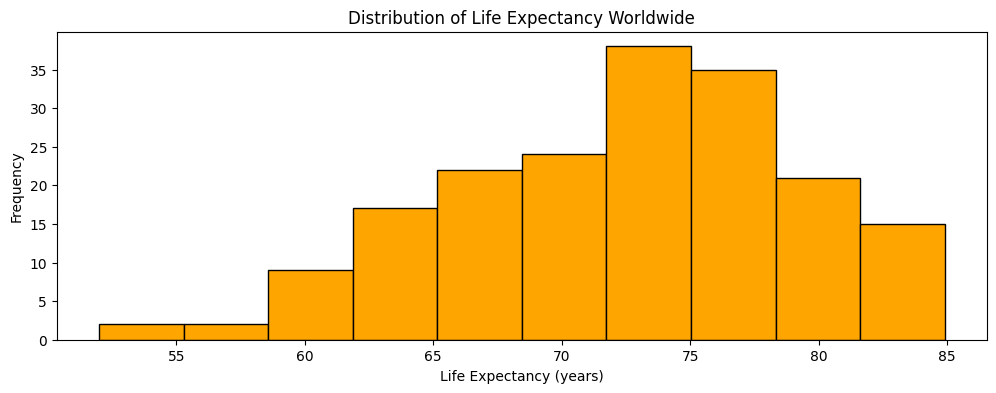

In [19]:
fig1, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4))
# Plot histogram
ax1.hist(le, bins=10, color='orange', edgecolor='black')
ax1.set(title = 'Distribution of Life Expectancy Worldwide',
           xlabel = 'Life Expectancy (years)',
           ylabel = 'Frequency',
          )
plt.show()


#### Variability of Life Expectancy from Mean
In the previous section, we concluded that the data for life expectancy was leftskewed, or negatively skewed, but that was just us telling you without any
context or visualization, and hoping you'd take it as it is. To get a better
understanding of why the data for life expectancy is negatively skewed, we have
shown a scatter plot of the life expectancy versus difference from the mean. In
short, this graphic will show how far, positively or negatively, each value of life
expectancy is from the mean. While there are other ways to create this type of
visualization, this scatter plot allows one to visibily observe the outliers in the
data. For ease, we have also indicated the 0 point mark on the y-axis as the
mean. Data points that intersect this red line are the average. Data points above
the average are points that have brought the average up, while data points
below the red line are points that have brought the average down. In observing
the graph, we can see that a lot of the data points do remain close to the red
line, but as one ventures in either direction, the data points become further and
further from the red line. We also see that there are two main outliers between
the 50 and 55 year range. These two outliers can be recognized as the reason for
the negatively skewed data.


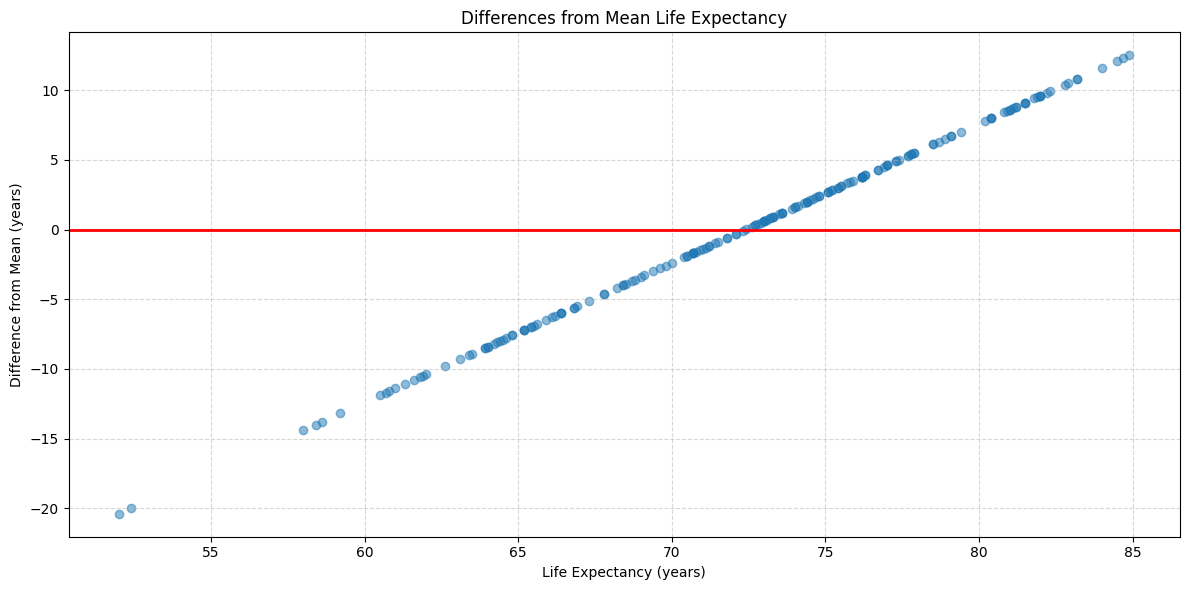

In [20]:
mean_le = np.mean(le)
countries = data['country']
# Calculate the absolute difference between each life expectancy value and the mean
absolute_differences = (le - mean_le)

# Plot scatter plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.scatter(le, absolute_differences, alpha=0.5)

plt.title('Differences from Mean Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Difference from Mean (years)')  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


---

### Cumulative proportion plot of life expectancy

Now, we're going to make cumulative proportion plot using `hist()`.



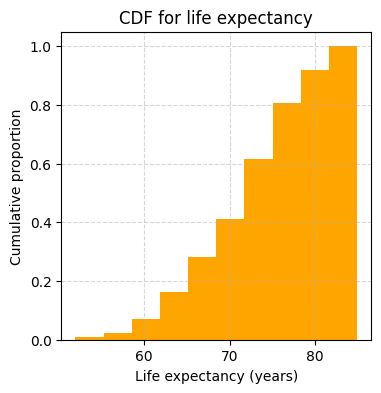

In [21]:
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ax2.hist(le, bins=10, cumulative=True, histtype='stepfilled', density=True, color='orange')
ax2.set(title = 'CDF for life expectancy',
        xlabel = 'Life expectancy (years)', 
        ylabel = 'Cumulative proportion')
plt.grid(True, linestyle='--', alpha=0.5)

From the cumulative proportion plot above, it is evident that the gap between bars is narrower around 60 and 80 years, while there is a significant difference in gaps around 70 years.

This observation suggesta that the life expectancy dataset tends to cluster around 70 years.

---

### Box Plot of Life Expectancy

Next, we're going to make a boxplot of life expectancy using `boxplot()`.

[Text(0.5, 1.0, 'Boxplot of Life Expectancy'),
 Text(0, 0.5, 'Life Expectancy (years)')]

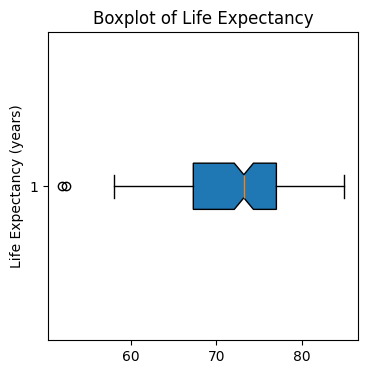

In [22]:

fig3, ax3 = plt.subplots(nrows = 1, ncols= 1, figsize=(4,4))
ax3.boxplot(le, patch_artist=True, notch=True, vert=False)
ax3.set(title='Boxplot of Life Expectancy',
           ylabel = 'Life Expectancy (years)')


In plotting the box plots, we are able to visual the median life expectancy
worldwide, as well as the range of values. This view allows us to view where 50%
of the data lies, bewteen the 1st Quartile and the 3rd Quartile, or the 25
percentile and the 75th percentile. This type of set up allows for comparison
between different country's as well. In the raw data file, there was data included
over a range of years for each country. Instead of simply one value per country,
each country had one value for each year for life expectancy. With that type of
data, one could create a boxplot for each country to show the range, median,
and Inter Quartile Range (IQR) for each country. One could also do this to
compare life expectancy by year, instead of country, as well. However, being
that our merged data set only contained one value for each country, the best
visualization for for this boxplot was to show the life expectancy as a whole
across the world.

As we can see, this life expectancy dataset contains some outliers and is left-skewed, as indicated by the longer left whisker compared to the right whisker.

---

### Scatter plot between fertility rate and life expectancy

We're going to create a scatter plot between fertility rate and life expectancy using **scatter() method** in matplotlib.

X label indicates fertility rate and Y label indicates life expectancy. 

We set a marker style as a star and a line color as <span style="color:green">green</span>. 

Text(0, 0.5, 'Life Expectancy (yr)')

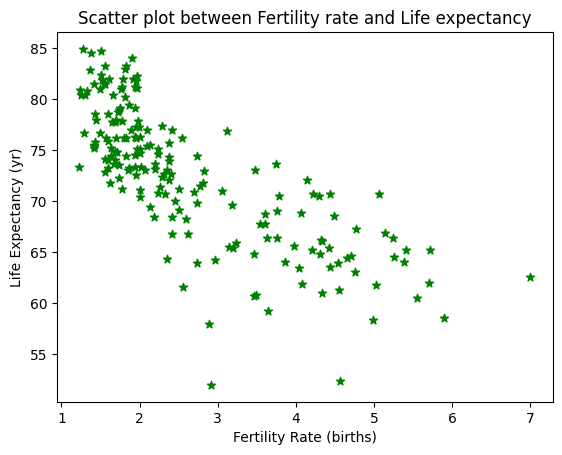

In [23]:
plt.scatter(x= data['Fertility_rate(births)'], y= data['Life_expectancy(yr)'], c= 'g', marker='*')

plt.title('Scatter plot between Fertility rate and Life expectancy')
plt.xlabel('Fertility Rate (births)')
plt.ylabel('Life Expectancy (yr)')

There is **a negative association**, meaning, as fertility rate tend to decrease, life expectancy tend to increase, on average. While this may seem
counterintuitive, the data suggests that there appears to be a somewhat strong,
negative association between the two. But how strong of an association is there
between these two variables? We'll discuss this in the next section.


## **4. Independence**

We're going to compute two measures of dependence/independence between fertility rate and life expectancy.
 
1. ***covariance***
2. ***correlation coefficient***


First of all, we're going to caculate **a covariance** between fertility rate and life expectancy using **numpy cov() method**. 
`x` is fertility rate and `y` is life expectency.

Since the result of .cov() is matrix, the covariance between the two data is obtained by specifying row and column values(**[0][1]**).

In [24]:
covariance = np.cov(data['Fertility_rate(births)'], y= data['Life_expectancy(yr)'])
print(f'A covariance between Fertility rate and Life expectancy is {covariance[0][1].round(2)} years.')

A covariance between Fertility rate and Life expectancy is -6.35 years.


**A covariance of -6.35** between two datasets indicates ***a negative linear relationship*** between them. 

This means that as one dataset increases, the other dataset tends to decrease. 

Next, we're going to calculate a **correlation coefficience** using **numpy corrcoef() method**. `x` is fertility rate and `y` is life expectancy.

Since the result of .corrcoef() is matrix, the correlation coefficient between the two data is obtained by specifying row and column values(**[0][1]**).

In [25]:
correlation_coefficience = np.corrcoef(x= data['Fertility_rate(births)'], y= data['Life_expectancy(yr)'])
print(f'A correlation coefficient between Fertility rate and Life expectancy is {correlation_coefficience[0][1].round(2)}')

A correlation coefficient between Fertility rate and Life expectancy is -0.76


A correlation coefficient of `-0.76` indicates ***a strong negative linear relationship*** between the two datasets. This means that as one dataset increases, the other dataset tends to decrease. This suggests the more
children a woman births, the lower the life expectancy. 

Now, there are of course other factors that go into such a relationship. Factors like health, resources, education, and many others can all be contributing factors to life expectancy.
However, being that we are only analyzing the relationship between fertility rate and life expectancy, these are the conclusions that we can make as of now.

The closer the correlation coefficient is to -1, the stronger the negative linear relationship between the variables. Therefore, a correlation coefficient of -0.76 suggests a strong negative linear association between the two variables.

## **5. Distributions** 

In this section, we will create a density histogram for the life expectancy data set. This visualization is quite useful, as it's ease of use allows for a smooth interpretation process. For example, in an arbitrary density histogram, the area of the rectangle represents the relative frequency for which that corresponding class occurred. This is not to be confused with the frequency; the relative frequency refers to the proportion for which an event occurs within a given data set. The difference being that in a frequency histogram, adding together all the rectangles for every class will not be equal to 1, while adding together the rectangles for every class in a relative frequency distribution must equal to 1. The base, or width, of the rectangle represents the bin size, and the height of the rectangle represents the density. 

In regards to our life expectancy data set, the base of each bin will represent a range, in years, and the height will again still be the density. Adding together every rectangle for each range of years must be equal to one, as the sum of all proportions must equal to 1. 

We will also create a Q-Q plot to determine whether our data follows a the theoretical normal distribution. Here, we will plot a theoretical straight line at a 45$^\circ$ angle, alongside the actual data points from our data. If our data comes from a normal distribution, there will be minimal deviation from the theoretical line. However, if our data shows big deviations from the theoretical line, then our data will not follow a normal distribution. 

#### Life Expectancy Data Set Parameters

In [26]:
mu = round(life_mean,2)
sigma = round(life_stdev,2)
sample_size = len(le)
print(f'With the life expectancy data set, we can retrieve the parameters for the distribution. The size of the life expectancy data set is {sample_size}, the mean of the distribution is {life_mean.round(2)} years, and the standard deviation of the distribution is {life_stdev.round(2)} years')

With the life expectancy data set, we can retrieve the parameters for the distribution. The size of the life expectancy data set is 185, the mean of the distribution is 72.39 years, and the standard deviation of the distribution is 6.73 years


#### Life Expectancy Density Histogram with Theoretical Density Function

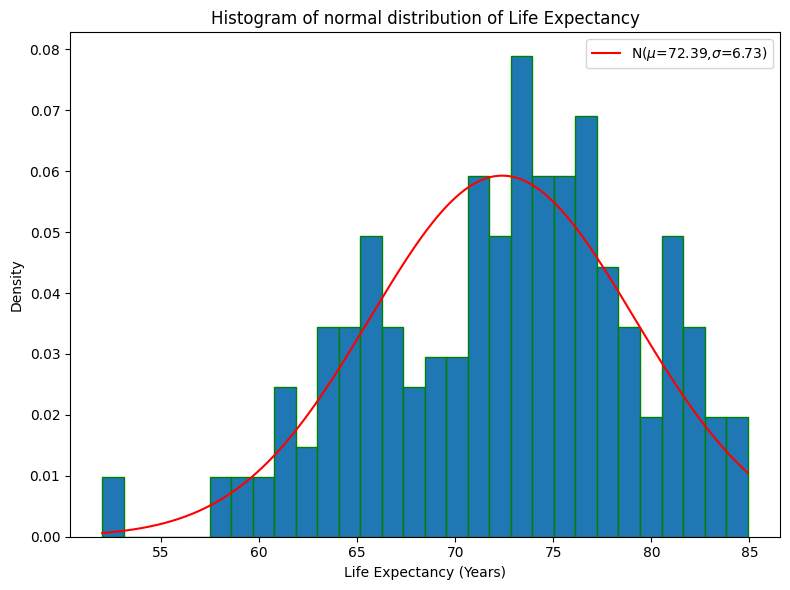

In [27]:
num_bins = 30
fig5, ax5 = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
ax5.hist(le,num_bins ,edgecolor = 'green',density=True)
ax5.set_xlabel('Life Expectancy (Years)')
ax5.set_ylabel('Density')
ax5.set_title('Histogram of normal distribution of Life Expectancy')

r = np.arange(le.min(),le.max()+0.01,0.01)
PDF_r = norm.pdf(r,loc=mu, scale=sigma)
ax5.plot(r,PDF_r, color='r', label=f'N($\mu$={mu},$\sigma$={sigma})')

plt.legend()

plt.tight_layout()
plt.show()

#### Q-Q Plot of Life Expectancy 

In this section, we create the Q-Q plot to compare our data against a normal distribution. The theoretical quartiles are shown along the x-axis, while our actual data for those quartiles are plotted along the y-axis. The red, 45$^\circ\$ angeled line represents the theoretical quartile for a normal distribution. Thus, data points that are close to the red line follow a normal distribution at that specific quartile, while data points far from the red line do not follow a normal distribution at that specific quartile. 

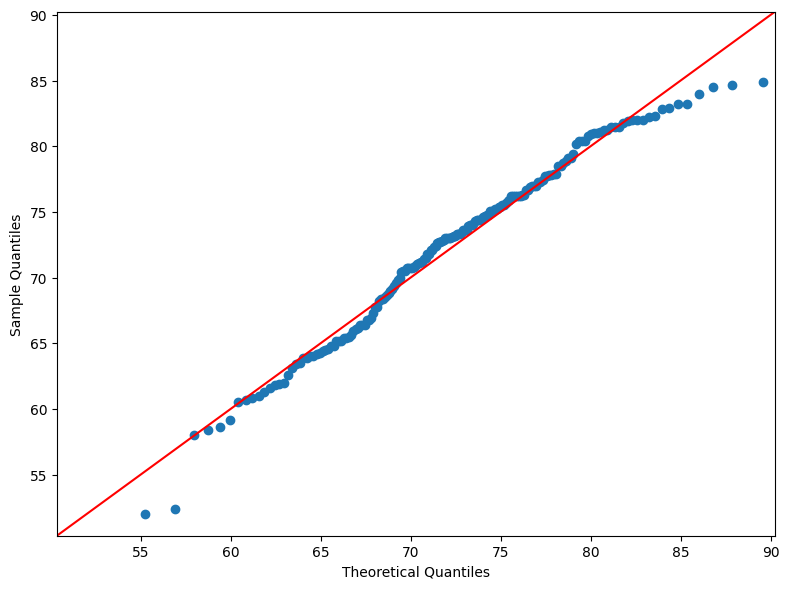

In [28]:
fig6, ax_6 = plt.subplots(nrows=1,ncols=1, figsize=(8,6))

sm.qqplot(le, line='45', loc=mu, scale=sigma, ax=ax_6)

plt.tight_layout()
plt.show()

From the Q-Q, plot we observe that a majority of the data points lie very close the the ideal normal distribution. However, the discrepancies occur at low life expectancies and at high life expectancies (the extremes of the data). We can conclude data ranging from around the 57th quartile to around the 83rd quartile are suitable for the normal distribution. While there are data points that fall above and below the theoretical line within this range, the deviations appear to be minal, and can be described as normally distributed. 

On the other hand, data below the 57th quartile and data above the 83rd quartile deviate significantly from the theoretical normal distribution line, and thus can not be viewed as suitable for the normal distribution. 

## **6. Confidence Interval Estimation for mean using bootstrapping**

In this section, we're going to calculate confidence interval estimation for mean using bootstrapping.

First of all, we are going to recompute the mean of the data set and save it as `le_pop_mean`.

In [29]:
le_pop_mean = le.mean()
print(f'A population mean of life expectancy is {le_pop_mean.round(2)} years')

A population mean of life expectancy is 72.39 years


Next, we use ***random.seed()*** and ***random.choice()*** in order to select a random sample with a size 10 and save it as `sample`.

In [30]:
# Select a random sample using Python with a size equal to 10. Save it as sample . 
# Output all the values of the sample. 

#set the random seed equal to 93
random.seed(93)

# select a random sample
sample = random.choices(list(le), k=10)

# Output all the values of the sample.
print(f'The selected sample is: {sample} years')

The selected sample is: [77.8, 81.2, 65.6, 66.1, 69.8, 66.1, 77.7, 73.6, 83.2, 76.3] years


We can get 10 samples from `le` and use it for next steps.

We also compute a point estimate for the population mean based on `sample`.

In [31]:

sample_mean = np.mean(sample)
print(f'Point estimate for the population mean based on the sample is {sample_mean} years.')

Point estimate for the population mean based on the sample is 73.74 years.


---

We're going to bootstrapping to gauge the population mean.

We'll generate 5000 bootstrapped sample from `sample` dataset. Then, we'll use these to compute **a two-sided 95% confidence interval** based on it.

To calculate the confidence interval, we use ***np.percentile()*** method. Passing in `bootstrap_means` and `[2.5, 97.5]` as parameters, we're aiming for getting **a two_sided 95%** confindence interval. Since np.percentile returns two values, we assign each of them as `low` and `high`.
The interval between the 2.5 percentile and the 97.5 percentile would correspond to the middle 95% of the bootstrap means.


In [32]:
random.seed(93)

n_samples = 5000

bootstrap_means = []

for i in range(n_samples):
    le_bootstrap = random.choices(list(sample), k = len(sample))
    le_bootstrap_mean = np.mean(le_bootstrap)
    bootstrap_means = np.append(bootstrap_means, le_bootstrap_mean)

print(f'Sample bootstrapped means are [{bootstrap_means[0].round(2)}, {bootstrap_means[1].round(2)}, ..., {bootstrap_means[-1].round(2)}] years.')


# get the 2.5 and 97.5 percentiles of the bootstrapped means
low, upper = np.percentile(bootstrap_means, [2.5, 97.5])
print(f'\nA two-sided 95% confidence interval using Bootstrapping is ({low.round(2)}, {upper.round(2)}) years')

Sample bootstrapped means are [74.7, 74.63, ..., 71.28] years.

A two-sided 95% confidence interval using Bootstrapping is (69.85, 77.56) years


We've obtained a two-sided 95% confidence interval of ***(69.85, 77.56) years*** using bootstrapping.

The first value, ***69.85 years*** represents the lower bound of the confidence interval and indicates the minimum plausible value for the population mean, while the second value, ***77.56 years*** represents the upper bound of it and the maximum plausible value.

This confidence interval with 95% confidence suggests that the population mean of life expectancy lies between 69.85 years and 77.56 years with 95% confidence. In other words, the values within this range are highly likely to represent the population mean of life expectancy based on the sample data. 

---

Now, let's visualize the distribution of bootstrapped means using a frequency histogram and also draw the confidence interval. 

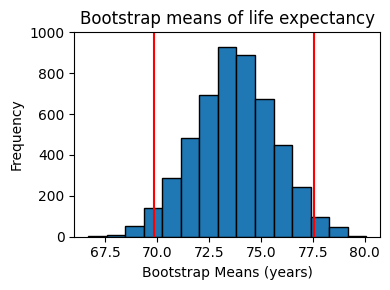

In [33]:
# Plot a frequency histogram of the bootstrapped means and show the confidence interval. (5 pts)
fig_7, ax_7 = plt.subplots(nrows=1, ncols=1, figsize = (4, 3))
ax_7.hist(bootstrap_means, bins=15, ec='k')

# show the confidence interval
ax_7.vlines(low, 0, 1000, 'r')
ax_7.vlines(upper, 0, 1000, 'r')

ax_7.set(title = 'Bootstrap means of life expectancy', 
         xlabel = 'Bootstrap Means (years)',
         ylabel = 'Frequency', 
         ylim = (0, 1000))

plt.tight_layout()
plt.show()

We previously determined the population mean, `le_pop_mean`to be 72.39 years. 
Given that the confidence interval we calculated is ***(69.85, 77.56) years*** and the population mean is within the confidence interval, we can conclude that the confidence interval includes the population mean. 

---

Now, let's explore how the confidence interval changes when sample size increases to 40 (bigger than 10).
If sample size increases, we can conclude that the confidence interval on a sample of size 40 becomes narrower than the confidence interval on a sample of size 10.
This phenomenon is rooted in the equation of the confidence interval.


$$\overline{x} \pm c \dfrac{s}{\sqrt{n}}$$

where $c$ is the critical value:
* $z_{\alpha/2}$ if the sample is large enough
* $t_{\alpha/2}$ if the sample is small and the population follows a normal distribution


As the sample size $n$ increases, the entire value $$c \dfrac{s}{\sqrt{n}}$$ are going to be small.

Consequently, a larger sample size result in a narrower confidence interval.


## **7. Hypothesis Testing for Mean**


Let's define hypotheses. For this set, we are considering that the population mean of life expectancy is **not equal to 72 years**. Thus, we define our null and alternative hypotheses as follows: 

**$H_0: \mu = 72$ years**

**$H_1: \mu \neq 72$ years**

where $\mu$ represents the population mean of life expectancy.

The null hypothesis $H_0$ states that the population mean of life expectancy is 72 years.

Conversely, the alternative hypothesis $H_1$ states that the population mean of life expectany is not 72 years.

We've opted for ***72 years*** as our reference point because it closely aligns with the population mean of 72.39 years.

Additionally, we assume that **the underlying population follows a normal distribution** and we only have `sample` dataset.


---

Now, we're going to test our hypotheses.

Given that our population follows a normal distribution and our sample size is small (n=10), we'll use the ***ttest_1samp()*** method from among *ztest(), ttest_1samp(), and ttest_ind()* methods.

We'll put `sample`, `popmean=72`, `alternative = 'two-sided'` as parameters. 

This method returns **the t-statistic** and **the p-value associated with the given alternative**. We'll save these values in `t_score` and `p-value`, respectively.

In [34]:
t_score, p_value = ttest_1samp(sample, popmean = 72, alternative = 'two-sided')
print(f'The t-score of the test statistic is {t_score.round(2)} and the p-value is {p_value.round(2)}')

The t-score of the test statistic is 0.84 and the p-value is 0.42


---

We're going to draw conclusions based on results and **a significance level of 0.05**.

When we make a statistical decision, we can use 3 method : **$p$-value**, **Rejection region**, **Confidence interval**. We're going to use **$p$-value**, **Confidence interval** to draw a conclusion.




##### 1. $p$-value

We can conclude that the population mean of life expectancy is 72 years and **fail to reject $H_0$** since **the $p$-value (0.42) > a significance level (0.05)** so the result is not statistically significant at the 5% level .

This is because a p-value not low enough implies that it is not very unlikely we observe a sample as extreme as our sample if $H_0$ were true. Thus, we can think that the population mean of life expectancy is equal to 72 years.

Therefore, we're going to adjust ***a significance level to 0.5***. 

Now, we can conclude that the result is statistically significant at the 50% level and we can **reject $H_0$** since the **$p$-value (0.42) < a significance level (0.5)**. This indicates that the population mean may not be 72 years.

##### 2. Confidence Interval

Referring to the two-sided 95% bootstrapped confidence interval ***(69.85, 77.56) years***, we find that the null**fail to reject $H_0$** and conclude that the population mean of life expectancy is 72 years.

This is because the null hypothesized value **$H_0: \mu = 72$ years** is within the confidence interval.


---

Now, we're going to compare our conclusion based on the $p$-value at the 5% significance level with that based on bootstrapped confidence intervals. 

Overall, both the $p$-value approach and the confidence interval approach lead to the same conclusion: There is no sufficiencet evidence to prove that the population mean is not equal to 72 years. 

Therefore, we cannot judge which method is more appropriate but believe that ***$p$-value (using existing Python functions) has advantages than the confidence interval***. This is because when $a$ value is changed, rejection region and confidence interval will change while $p$-value remains the same. Based on this point, using $p$-value would be more convenient in this case because it simply compare $a$ to the $p$-value. 

• Discuss the adjustments you would make to your procedure and the Python function if the sample size was 40. Predict if the p-value would decrease, increase, or if it would be impossible to determine. Do not
redo the test, only discuss and provide a clear and complete explanation. (5 pts)


Lastly, we'll talk about the adjustments we want to make and the status of $p$-value when the sample size is 40.

If the sample size were increased to 40, we need to take another method ***ztest()*** instead of ttest_1samp() to calculate the test statistic and the $p$-value since the sample size is now large enough to satisfiy the conditions for using the z-distribution. 

Additionally, we need to **choose another critical value $a$** since the population parameters could also be affected and changed.

We would expect that the $p$-value would be decreased when we increase the sample size. This is because the precision would be increased and the variability would be reduced.

## **8. Linear Regression**

In this section, we will explore the relationship between our two data sets to determine if a linear relationship deems appropriate to apply. To make this determination, we will use the `scikit-learn` packakge to perform a linear regression. In short, the linear regression analysis allows one to make a prediction about one variable based on the value of another variable, where the variable we are trying to predict will be the dependent variable, and the variable we are making predictions from will be the independent variable. 

Below, we have generated two plots of the real, raw data from our data sets. The first plot is a scatter plot, plotting the `Life Expectancy` data against the `Fertility Rate` data (y against x), while the second plot is another scatter plot, but with the variables switched on the axes. 

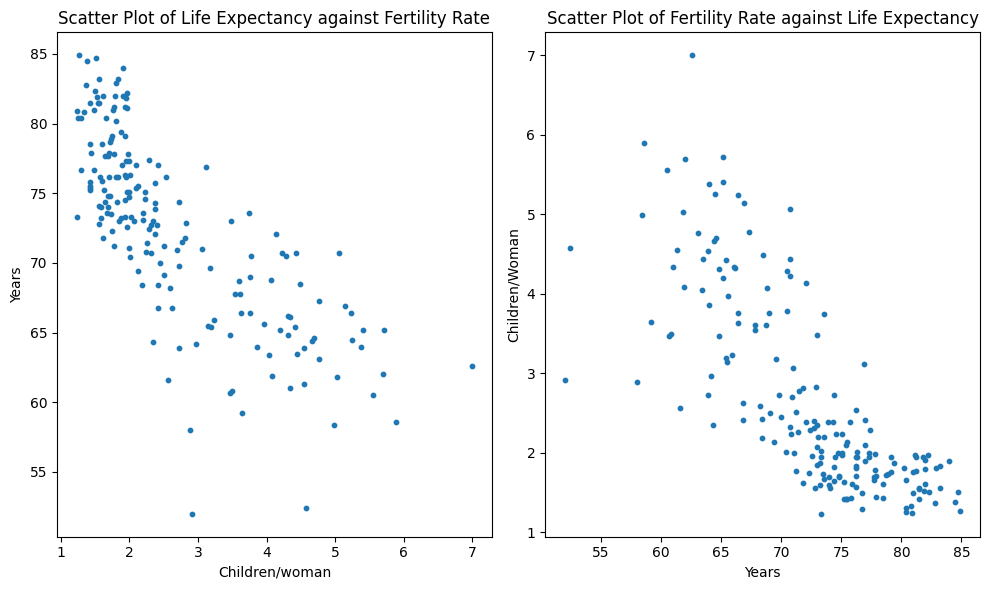

In [35]:
fig_7, ax_7 = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

ax_7[0].scatter(fr,le,s=10)

ax_7[0].set_xlabel('Children/woman')
ax_7[0].set_ylabel('Years')
ax_7[0].set_title('Scatter Plot of Life Expectancy against Fertility Rate')

ax_7[1].scatter(le,fr,s=10)

ax_7[1].set_xlabel('Years')
ax_7[1].set_ylabel('Children/Woman')
ax_7[1].set_title('Scatter Plot of Fertility Rate against Life Expectancy')

plt.tight_layout()
plt.show()

From the scatter plots above, we can't exactly determine any type of relationship from simply observing the data points. While there does appear to be some type of negative relationship, where a higher fertility rate leads to shorter life expectancy, we can't make this determination with complete confidence based of the scatter plot alone.

Thus, we'll use a linear regression analysis to guide our conclusions!

Before proceeding, we must keep in mind some assumptions tied into the linear regression model. 

1. Linear relationship between X and Y variables
2. Independent error terms
3. Normally distributed error terms
4. Equal variance of residuals along regression line

With these are satisifed, the residuals should reflect these properties, and we can use graphics of the residuals to make our conclusions.


We'll begin by transforming our data into numpy arrays, and formatting the x variable, or our independent variable so that it is a two-dimensional with 1 column

In [36]:
le=np.array(le)
fr=np.array(fr)

fr_reshape = fr.reshape(-1,1)

print('Fertility Rate: shape '+ str(fr_reshape.shape))
print('\n\n Life Expectancy: shape '+ str(le.shape))

Fertility Rate: shape (185, 1)


 Life Expectancy: shape (185,)


Being that we are making the `Fertility Rate` the `x` variable, this would indicate that it will be the **Independent Variable** that we will use to make predictions about the `Life Expectancy`, which will be our **Dependent Variable** for the linear regression analysis. We can now begin by creating the linear regression model and fit using our real data.

In [37]:
model = LinearRegression()
model1 = model.fit(fr_reshape,le)

The code above creates the linear regression model using our data, so that it will best fit the parameters of the following model: 

`Life Expectancy` = $\beta_0 + \beta_1 \times$`Fertility Rate`

Where $\beta_0$ estimates the y-intercept, in years 

and $\beta_1$ represents the slope, in years per fertility rate

In [38]:
beta_0= model1.intercept_
beta_1=model1.coef_[0]

print(f'The Intercept for the best fitted parameters is: {beta_0:.3f} years' if not isinstance(beta_0, type(Ellipsis)) else None)
print(f'The Slope for the best fitted parameters is: {beta_1:.3f} years per children/woman' if not isinstance(beta_1, type(Ellipsis)) else None)

The Intercept for the best fitted parameters is: 83.493 years
The Slope for the best fitted parameters is: -4.170 years per children/woman


With our fitted model in hand, we will plot the regression line along the scatter plot from before to compare how well our linear regression fits our given data. To plot the regression line, we will use the `predict()` method to make predictions about Life expectancy from our existing `Fertility Rate` data. We can then plot the predictions along the scatter plot of our real data to draw conclusions on the accuracy of our linear regression model.

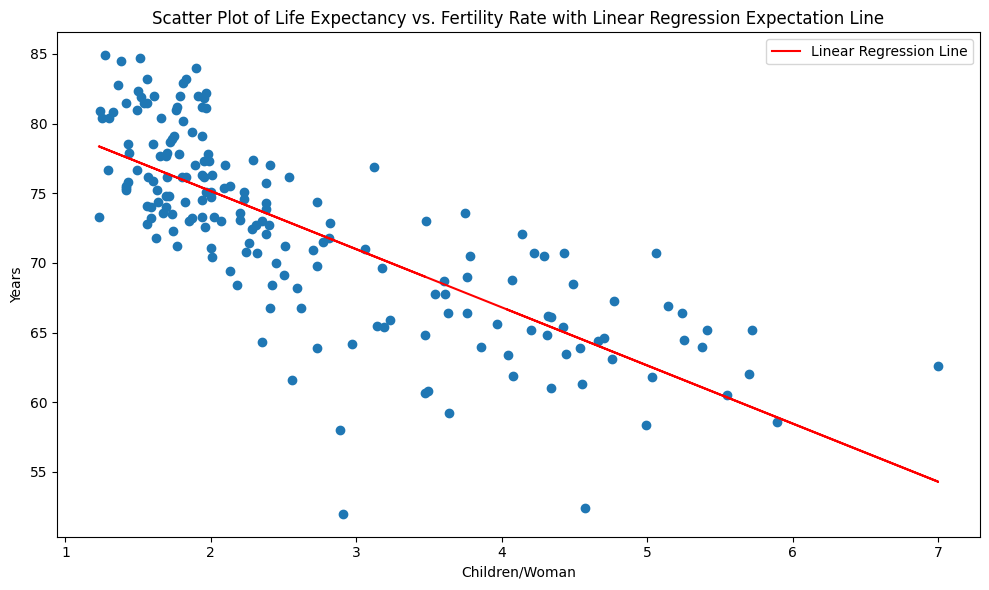

In [39]:
le_pred = model1.predict(fr_reshape)

fig_8, ax_8 = plt.subplots(nrows=1,ncols=1, figsize=(10,6))

ax_8.scatter(fr_reshape, le)

ax_8.plot(fr_reshape, le_pred, c='r', label='Linear Regression Line')

ax_8.set_xlabel('Children/Woman')
ax_8.set_ylabel('Years')
ax_8.set_title('Scatter Plot of Life Expectancy vs. Fertility Rate with Linear Regression Expectation Line')
plt.legend()
plt.tight_layout()
plt.show()


To draw conclusions from simple observations of the graphic above, while easier than before, still proves to be a difficult task. Instead of making conclusions with our eyes, we'll calculate the coefficient of determination to quantify how "good" the fit really is. 

In [40]:
r2 = model1.score(fr_reshape,le)
print(f'r^2: {r2:.3f}' if not isinstance(r2, type(Ellipsis)) else None)

r^2: 0.584


The coefficient of determination ranges on a scale from 0 to 1, where higher values closer to 1 suggest a better fit. With a coefficient of determination value of 0.584, this suggests that our model shows a moderate linear relationship between Life Expectancy and Fertility Rate. This moderate relationship can be attributed to the outliers we see from the graphic above, especially as fertility rate increases. As fertility rate increases, we see that the variance with respect to the regression line greatly affects our model. For example, the data points at the very bottom of the plot along the x-axis near 3 and inbetween 4 and 5 prove to vary greatly from their expected values. 

#### Residual Plot

To address assumptions 1, 2 and 4 of the linear regression model, we can plot the residuals against the x values or the estimated values. We define residuals as the the y variable minus the predicted y variable: 

$e_i = y_i - \hat{y_i}$

where we have defined $y_i$ as `le` and $\hat{y_i}$ as `le_pred`

In [41]:
residuals = le-le_pred

print(f'Residuals: {residuals.round(3)} years' if not isinstance(residuals, type(Ellipsis)) else None)

Residuals: [ -3.247   4.265   1.496  -2.446   0.405  -2.863   1.188   6.954   4.428
  -4.712   2.94    4.254   0.705  -0.719  -0.454  -4.938   0.896  -3.938
  -2.172  -2.779  -1.469  -2.31   -2.93    0.213  -1.504  -2.104 -11.219
 -12.038   4.512   6.212   2.904   1.087   0.338  -1.48    5.558   0.337
   1.729   2.278  -1.22    2.621   2.379   2.853   1.679   3.72   -5.768
   5.087  -1.161   3.298   0.331   0.266  -3.398   3.928   1.254   1.185
   5.971  -5.002   6.921  -6.909  -0.932   3.704  -2.72   -1.415  -3.221
   4.839  -4.397   0.703   2.328  -1.77   -0.443  -6.644   6.761  -3.119
   0.411  -8.21   -1.73   -2.669  -3.353   5.821  -0.747   5.87    8.429
   4.745   0.838   6.416   7.503  -1.827  -1.957   1.166  -3.277  -8.141
   4.978   5.796  -3.969  -0.204   0.72    0.888  -2.372   2.105 -19.359
  -1.646   5.22   -0.921  -0.694  -5.064  -1.339   3.696  -1.862  -4.188
   2.274   5.062  -5.212  -2.255  -4.493  -4.286   5.679  -2.072  -0.722
  -0.179  -4.792   8.295   2.898   0.622

With the residuals in hand, we can create the scatterplots. The first scatterplot will represent the `Residuals` against the `Predicted Life Expectancy`, and the second scatterplot will represent the `Residuals` against the `Fertility Rate`

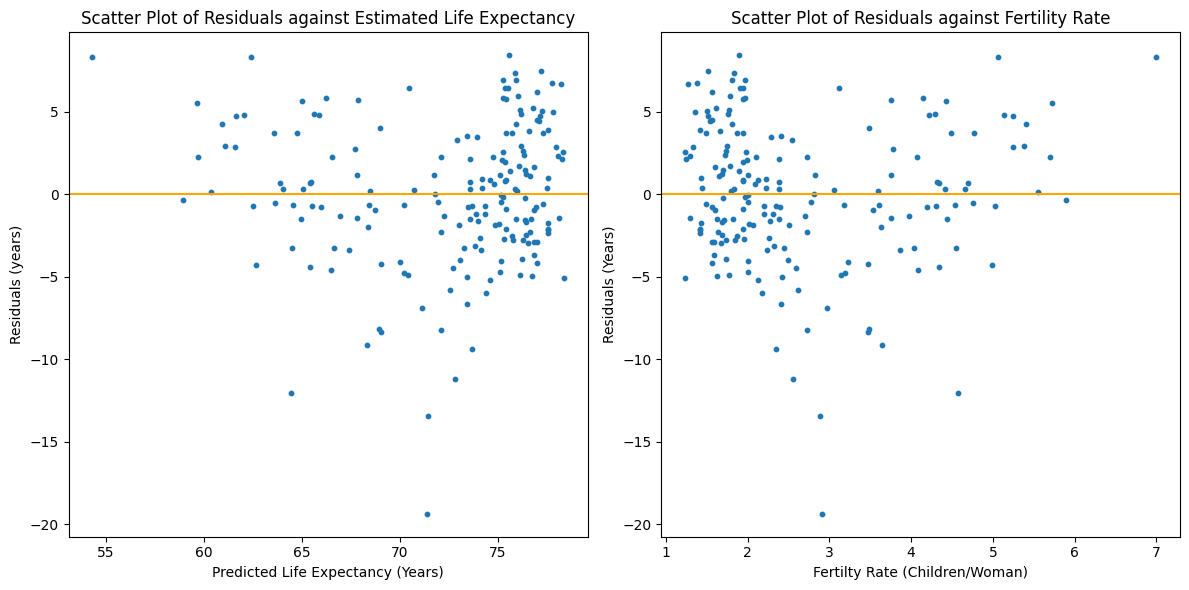

In [42]:


fig_9, ax_9 = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

ax_9[0].scatter(le_pred, residuals, s=10)
ax_9[0].axhline(y=0, color='orange')
ax_9[0].set_xlabel('Predicted Life Expectancy (Years)')
ax_9[0].set_ylabel('Residuals (years)')
ax_9[0].set_title('Scatter Plot of Residuals against Estimated Life Expectancy')

ax_9[1].scatter(fr,residuals, s=10)
ax_9[1].axhline(y=0, color='orange')
ax_9[1].set_xlabel('Fertilty Rate (Children/Woman)')
ax_9[1].set_ylabel('Residuals (Years)')
ax_9[1].set_title('Scatter Plot of Residuals against Fertility Rate')

plt.tight_layout()
plt.show()

We'll focus on the first scatterplot to address assumptions 1,2, and 4 of the linear regression model. 

For the model to be a good fit, the residuals should randomly bounce around the residual = 0 line. In short, this just means that there should not be a detectable pattern when observing the graphic. Upon close observation, we can conlcude that the data points are **indeed sporadic**, which would indicate that a linear relationship is a moderately reasonable assessment. 

For the model to be a good fit, the residuals should roughly form a horizontal band around the residual = 0 line. Upon observation, the residuals do **not** form a horizontal band around the the residual = 0 line, which would suggest that the variances of the error terms are **not** equal, and that independence is violated.

For the model to be a good fit, the variances should be equal in value. On the graph, this means that there should not be any outliers from the random pattern. However, upon observation, we see that there are numerous outliers whose variances greatly differ from the rest of the data. This suggests that variances of the residuals along the regression line are **not** equal, and equal variances is violated

From assumptions 1,2, and 4, only the assumption that linearity bewteen `Fertility Rate` and `Life Expectancy` holds, while equal variance and independent errors are violated. 

#### Histogram and Q-Q Plot of Residuals

Lastly, we still need to address the assumption of normally distributed errors. To do this, we'll plot both a histogram and a Q-Q plot of the residuals. If the normally distributed errors is to hold, then the frequencies of the residuals should have a bell-shaped curve on the histogram plot, and the quantiles in the Q-Q plot should follow a 1:1 straight line. 

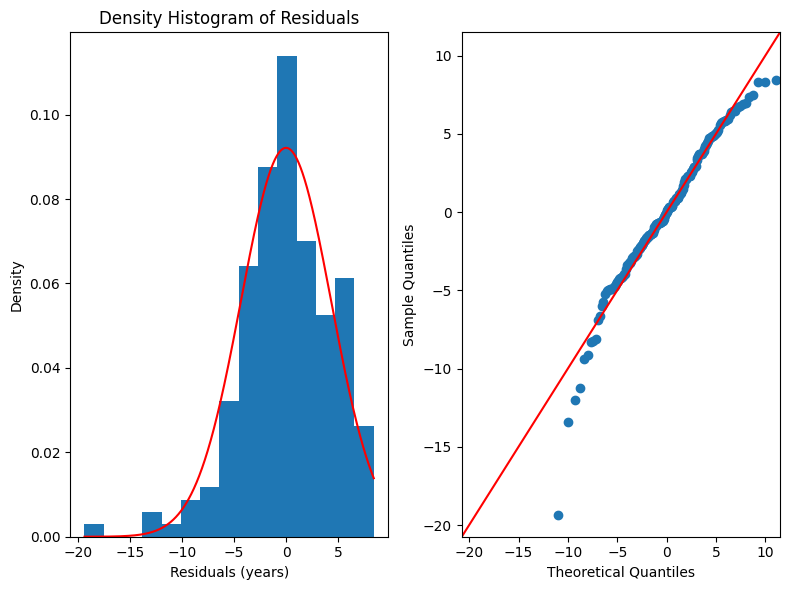

In [43]:
res_mean = residuals.mean()
res_stdev = residuals.std()

fig_10, ax_10 = plt.subplots(nrows=1,ncols=2,figsize=(8,6))

histogram = ax_10[0].hist(residuals,bins=15, density=True)

ax_10[0].set_xlabel('Residuals (years)')
ax_10[0].set_ylabel('Density')
ax_10[0].set_title('Density Histogram of Residuals')

res_range=np.arange(residuals.min(),residuals.max()+0.001,0.001)
PDF_res_range = norm.pdf(res_range,res_mean,res_stdev)
ax_10[0].plot(res_range,PDF_res_range,color='r')


ax_10[1]=sm.qqplot(residuals, line='45', loc=res_mean, scale=res_stdev, ax=ax_10[1])


plt.tight_layout()
plt.show()


From above the Frequencies follow a bell shape curve; however, it is not centered around Residual = 0, and shows a left-skewed distribution. Similarily, the Q-Q plot does show a nearly 1:1 straight line; however, there are also outliers that do not fit the line. 

Therefore, we can conclude that the assumption for normally distributed errors does hold up, but only at certain values.  

## **9. Conclusion**

From our analysis, we can conclude two major findings: 
1. Normal Distribution of Life Expectancy Population
2. Linear Relationship between Fertility Rate and Life Expectancy

In doing analysis for any z-statistic or t-statistic model, a normally distributed population was always just assumed to be true. However, in creating the Q-Q plot, we were able to confirm that the a normal distribution was correct, and thus our analysis in section 7 for hypothesis testing is viable. 

The other major finding we found was the relationship between our variables. In sections 3 and 4, we observed our scatter plot and quantified our finding of a strong, negative association between the two variables. However, we just made the assumption that a linear relationship was appropriate to desribe the variables. In section 8, we found that a linear relationship was appropriate to use when describing the relationship between the two variables, but a model different from the linear regression model could prove to be a better fit, as other assumptions in the linear regression model were violated. 

This moderate, negative, linear relationship between fertility rate and life expectancy could be attributed to other variables like resources available, like health care and child care. Being that our findings show that when fertility rates are higher, life expectancy is lower, this could indicate that there are less resources available to treat a larger population. This could be a possible explaination as to why a higher fertility rate generally indicates a lower life expectancy. 

Also, we observed many outliers within our data. This can be attributed a variety of exteneral variables beyond our data set. Some countries are more developed than others, with more established health care systems, economies, social structures, governments, and more. This could be a possible reason for some of the outliers we observed in our data. Additionally, factors like location, climate, weather, and geographic background were all not accounted for when performing our analysis, and could also be another reason for outliers within the data. 

